# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mayen abun
City not found. Skipping...
Processing Record 6 of Set 1 | samana
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | cadale
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | kerema
Processing Record 12 of Set 1 | arkhangel'sk
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | morehead city
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | turpan
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,1.24,82,100,3.04,SJ,1699672485
1,ust-nera,64.5667,143.2000,-27.46,97,55,2.05,RU,1699672485
2,blackmans bay,-43.0167,147.3167,18.74,47,42,2.68,AU,1699672485
3,port-aux-francais,-49.3500,70.2167,2.76,85,100,15.00,TF,1699672486
4,samana,19.2056,-69.3369,26.17,88,100,4.86,DO,1699672486


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,1.24,82,100,3.04,SJ,1699672485
1,ust-nera,64.5667,143.2000,-27.46,97,55,2.05,RU,1699672485
2,blackmans bay,-43.0167,147.3167,18.74,47,42,2.68,AU,1699672485
3,port-aux-francais,-49.3500,70.2167,2.76,85,100,15.00,TF,1699672486
4,samana,19.2056,-69.3369,26.17,88,100,4.86,DO,1699672486


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

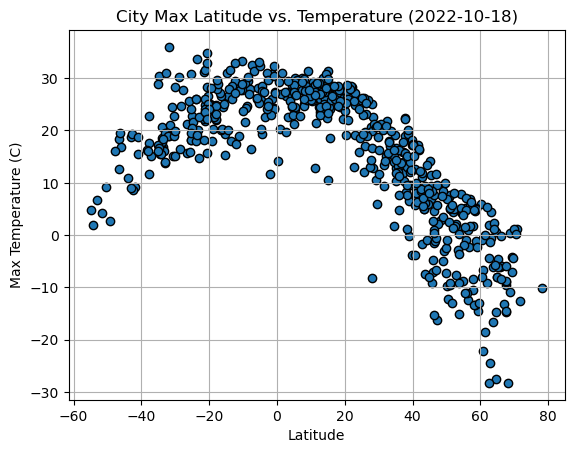

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

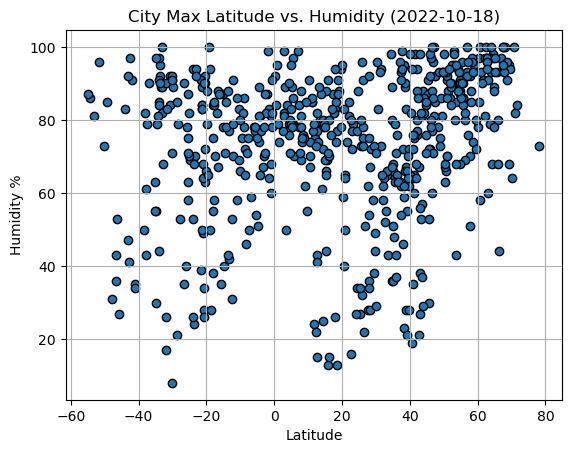

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

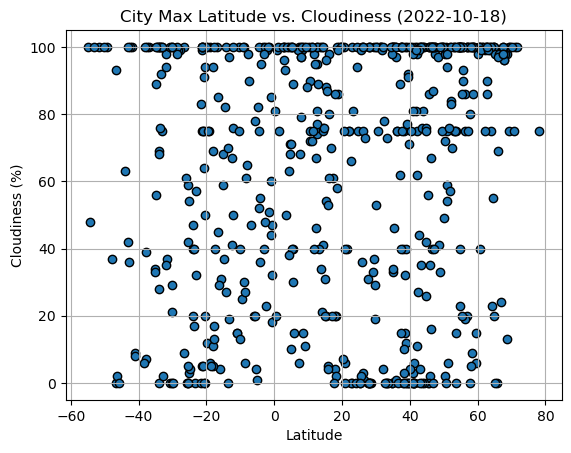

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

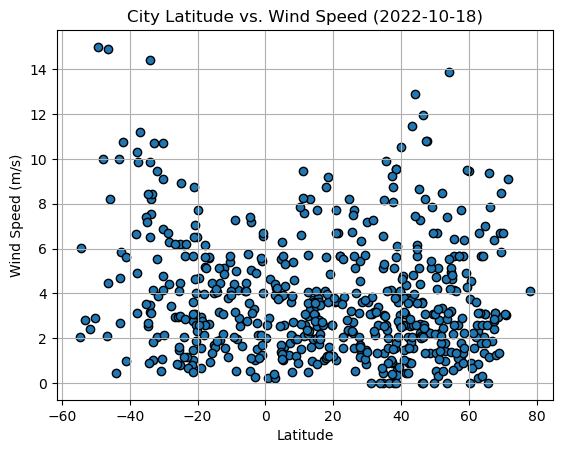

In [14]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, title, y_label, text_coordinates):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        print(f"The r-value is: {rvalue**2}")
        plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,1.24,82,100,3.04,SJ,1699672485
1,ust-nera,64.5667,143.2000,-27.46,97,55,2.05,RU,1699672485
4,samana,19.2056,-69.3369,26.17,88,100,4.86,DO,1699672486
6,cadale,2.7603,46.3222,26.55,82,100,3.94,SO,1699672486
8,jamestown,42.0970,-79.2353,7.77,80,100,2.06,US,1699672346


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,18.74,47,42,2.68,AU,1699672485
3,port-aux-francais,-49.3500,70.2167,2.76,85,100,15.00,TF,1699672486
5,atafu village,-8.5421,-172.5159,29.37,72,6,4.98,TK,1699672486
7,grytviken,-54.2811,-36.5092,1.99,86,48,6.01,GS,1699672486
9,kerema,-7.9631,145.7785,27.97,71,65,4.14,PG,1699672487


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7658805305648939


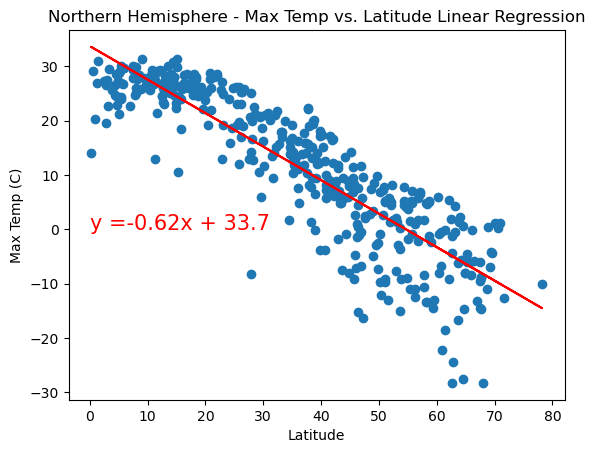

In [18]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
             'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp (C)', (0, 0))


The r-value is: 0.42688500127187756


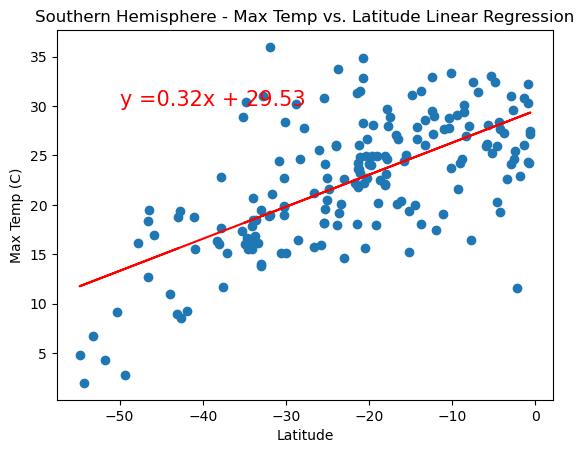

In [19]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
             'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp (C)', (-50, 30))


**Discussion about the linear relationship:** 

For both charts plotting latitude vs temperature per hemisphere, there is a strong linear regression between the two variables. The higher r-value for the northern hemisphere plot suggests that there is a much stronger positive correlation between temperature and latitude, than there is negative correlation between the two in the southern hemisphere. Of note, there is a greater amount of landmass in the northern hemisphere, as opposed to the southern hemisphere, which is more water. Land heats and cools faster and with greater variability than oceans, which maintain their temperatures more steadily. This is most likely what leads to the large spread of temperatures in the nothern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06559743395877364


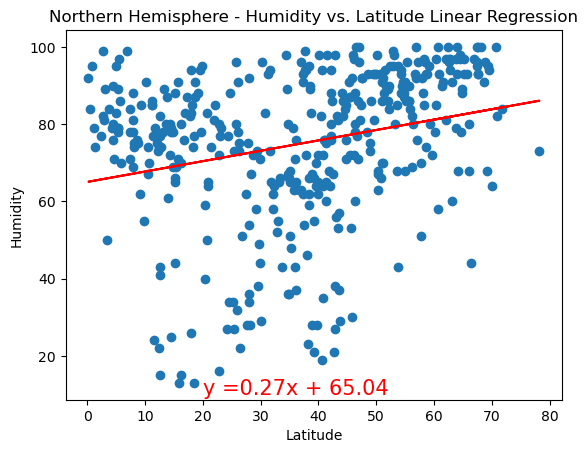

In [42]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
             'Northern Hemisphere - Humidity vs. Latitude Linear Regression', 'Humidity', (20, 10))

The r-value is: 0.006435176116503797


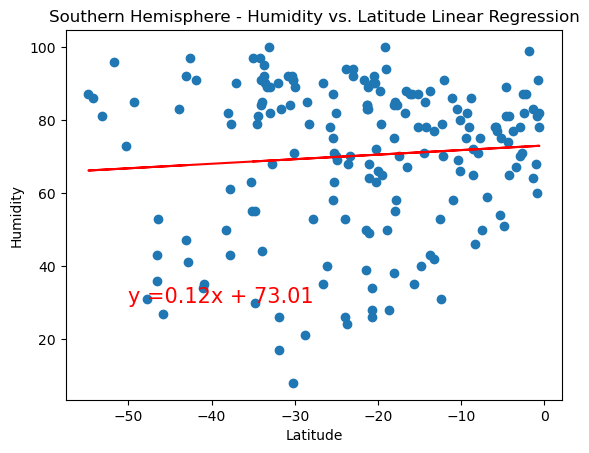

In [26]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
             'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 'Humidity', (-50, 30))

**Discussion about the linear relationship:**

Humidity in both the northern and southern hemispheres, has a nearly zero correlation to latitude, with both r-values being approximately .06. Of note, there is one area in the northern hemisphere chart, where between 10 and 40 degrees latitude, there is a noticeable increase in occurences of humidity below the 60 percent mark. I believe this is most likely due to the large amount of desert land that exists on the Earth if you look at a globe between the 10 and 40 lines of latitude. 

The regression plot stays in the upper boundaries, showing that for what little correlation there is, this is where it exists. For the southern hemisphere, the vast amount of water vs. land lends to less regular pattern in the dispersion of percentages. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00869964678865614


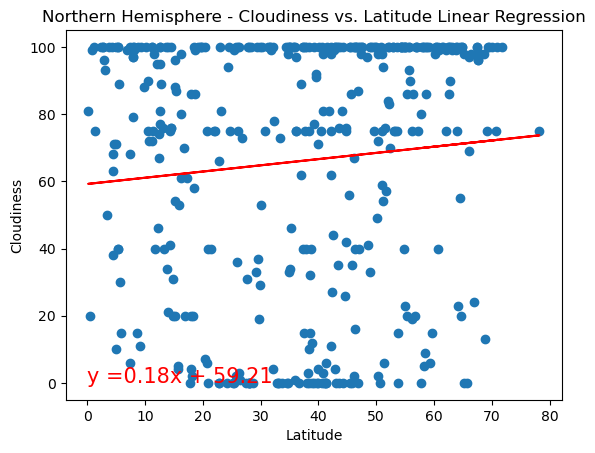

In [28]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
             'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Cloudiness', (0, 0))

The r-value is: 0.0026992388414906507


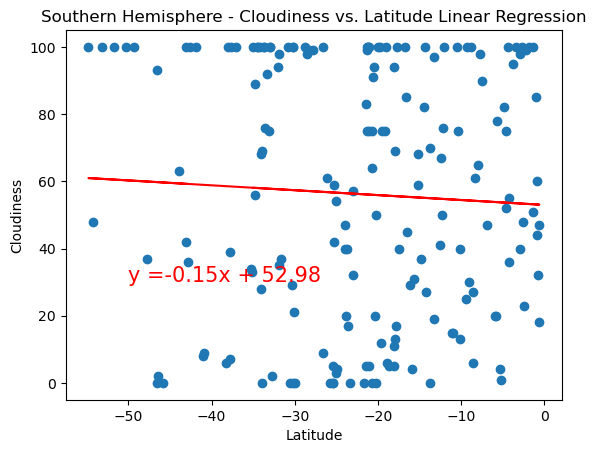

In [27]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
             'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Cloudiness', (-50, 30))

**Discussion about the linear relationship:** 

Similar to humidity, cloudiness has an almost zero correlation to latitude. However, unlike humidity in the southern hemisphere, cloudiness in the southern hemipshere has a slightly negative regression line, indicating a slight negative correlation. In summary, there are multiple factors that contribute to cloudiness in an ocean-heavy environment, leading to a large variation in the percentage of cloudiness across different latitudes. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0030329301476845947


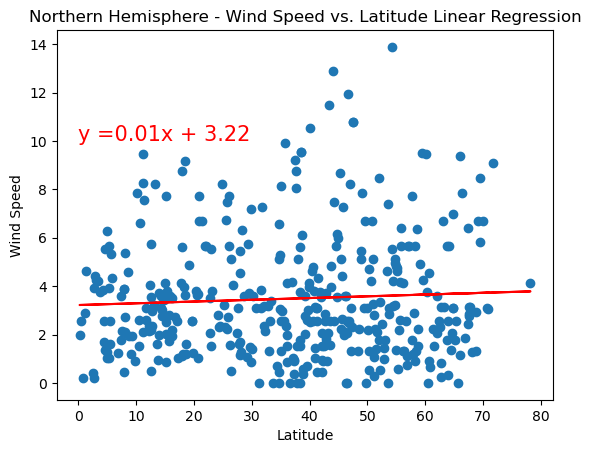

In [35]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
             'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Wind Speed', (0, 10))

The r-value is: 0.10128856262818248


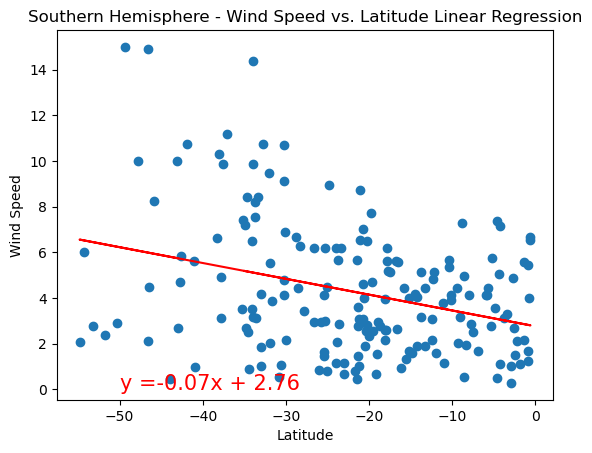

In [30]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
             'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Wind Speed', (-50, 0))

**Discussion about the linear relationship:**

Wind speed also shows a low correlation with latitude in both the northern and southern hemispheres. There are several factors affecting wind speed, including some different from the ones previously mentioned. The Coriolis effect, which is caused by the Earth's rotation, affects winds differently in one hemisphere than the other. In the nothern hemisphere, winds are deflected to the right of their path, while in the southern they are deflected to the left, and this is even more pronounced at higher altitudes. 